In [1]:
# %load_ext autoreload
# %autoreload 2
# from nn.value import Value
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from nn.value import Value, exp, log, softmax
from nn.module import Linear,MLP, Relu, Tanh

%matplotlib inline
np.random.seed(1337)
random.seed(1337)

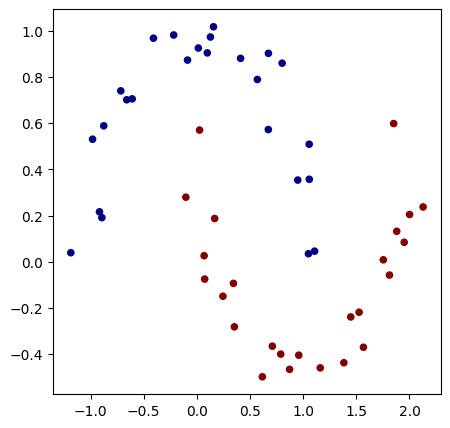

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X_raw, y_raw = X, y = make_moons(n_samples=50, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [8]:
lr = 1

X = torch.from_numpy(X_raw).float()
y = torch.from_numpy(y_raw)
w1 = torch.randn(2, 16, requires_grad=True)
b1 = torch.randn(2, requires_grad=True)
w2 = torch.randn(16, 2, requires_grad=True)
b2 = torch.randn(2, requires_grad=True)

params = [w1,b1,w2,b2]

for i in range(100):
    # fwd
    x = X@w1+b1
    x = torch.tanh(x)
    x = x@w2+b2
    y_logits = x
    y_probas = torch.softmax(y_logits, dim=1)
    nll = -torch.log(y_probas[torch.arange(0,len(y_probas)),y]).mean()
    loss = nll

    # zero grad
    for p in params:
        p.grad = None
    
    #backward
    nll.backward()

    with torch.no_grad():
        for p in params:
            p += -p.grad * lr
        
    # metrics
    y_preds = y_probas.argmax(1)
    acc = (y_preds == y).float().mean()

    if i % 10 == 0:
        print(f'loss {loss.item():.4f} | acc {acc:.4f}')

loss 1.7166 | acc 0.5000
loss 0.2714 | acc 0.8600
loss 0.1916 | acc 0.9200
loss 0.1481 | acc 0.9200
loss 0.1191 | acc 0.9200
loss 0.0974 | acc 0.9600
loss 0.0808 | acc 1.0000
loss 0.0682 | acc 1.0000
loss 0.0585 | acc 1.0000
loss 0.0508 | acc 1.0000
